In [1]:
#import the different packages used throughout
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import math
import datetime
import boto3
from os.path import expanduser
import os
import json
import glob
from scipy.stats import skew

%matplotlib inline

In [2]:
def heat_map_byCluster(monthToPlot,cluster_number,originalData,clusterLabels,Time):
    Time = np.array(Time)
    
    
    Lat = originalData[:,1]
    Lon = originalData[:,2]
    
    lat = np.unique(Lat)
    lon = np.unique(Lon)
    
    lon[lon<0]+=360
    
    ind = klabels_originalData==cluster_number
    time = Time[ind]
    Lat = Lat[ind]
    Lon = Lon[ind]
    ind = time==monthToPlot
    Lat = Lat[ind]
    Lon = Lon[ind]
    Lon[Lon<0] += 360
    
    LatLon = np.dstack((np.round(Lat),np.round(Lon)))
    pairs, counts = np.unique(LatLon[0],axis=0,return_counts=1)
    
    bbox = [-40,40,140,260]
    plt.figure(figsize=(12,6))
    # Define the projection, scale, the corners of the map, and the resolution.
    m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
                llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')
    cmap = plt.get_cmap('gist_earth')
    m.drawcoastlines()

    m.scatter(pairs[:,1], pairs[:,0], latlon=True,c=counts)

In [4]:
F = xr.open_dataset('K_DB_Clustered_Data.nc4')

100418
done


Text(0.5,1,'Range of Latent Heat Profiles in Events')

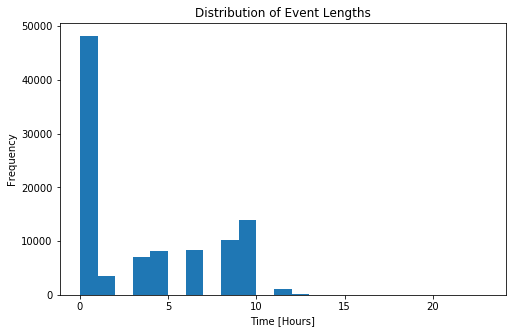

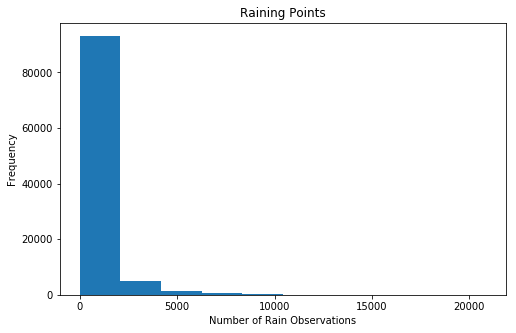

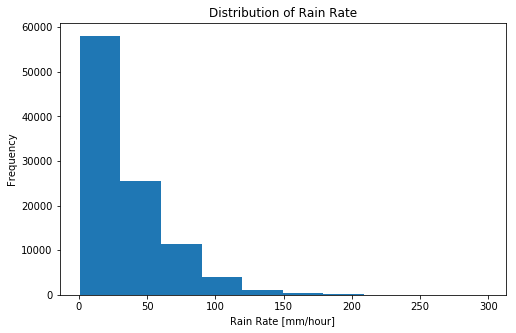

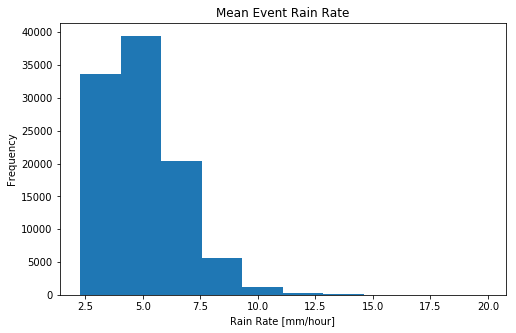

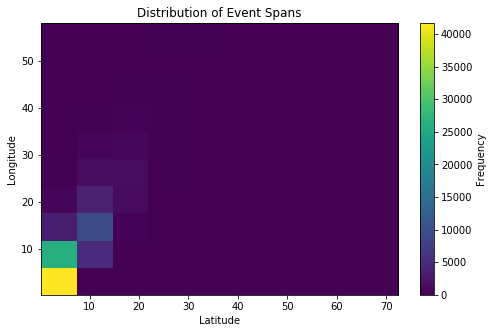

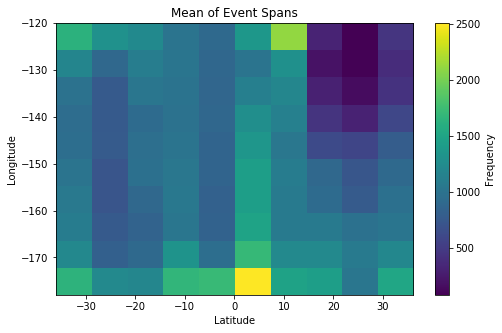

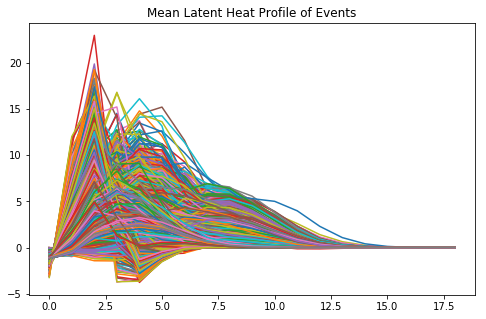

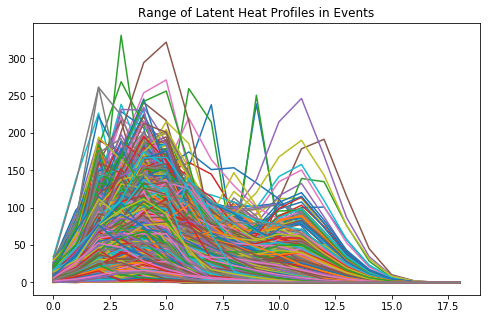

In [9]:
fig = plt.figure(figsize=(8,5))
plt.hist(cluster_spans[:,0],range(0,24))
plt.title('Distribution of Event Lengths')
plt.xlabel('Time [Hours]')
plt.ylabel('Frequency')

fig = plt.figure(figsize=(8,5))
plt.hist(cluster_count)
plt.title('Raining Points')
plt.xlabel('Number of Rain Observations')
plt.ylabel('Frequency')

fig = plt.figure(figsize=(8,5))
plt.hist(cluster_spans[:,3])
plt.title('Distribution of Rain Rate')
plt.xlabel('Rain Rate [mm/hour]')
plt.ylabel('Frequency')

fig = plt.figure(figsize=(8,5))
plt.hist(cluster_means[:,3])
plt.title('Mean Event Rain Rate')
plt.xlabel('Rain Rate [mm/hour]')
plt.ylabel('Frequency')


fig = plt.figure(figsize=(8,5))
plt.hist2d(cluster_spans[:,1],cluster_spans[:,2])
plt.title('Distribution of Event Spans')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar().set_label('Frequency')

fig = plt.figure(figsize=(8,5))
plt.hist2d(cluster_means[:,1],cluster_means[:,2])
plt.title('Mean of Event Spans')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar().set_label('Frequency')

fig = plt.figure(figsize=(8,5))
plt.hist2d(cluster_spans[:,0],cluster_means[:,3],range=[[0, 24], [0, 20]])
plt.title('Mean of Event Spans')
plt.xlabel('Time Duration')
plt.ylabel('Average Rain Rate')
plt.colorbar().set_label('Frequency')

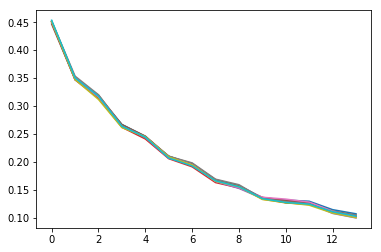

In [119]:
plt.plot(met);

(10, 19)
[-6.11286675e-08  1.38018317e-06  1.79836597e-06  2.19598466e-06
  1.35135502e-06  1.58228091e-06  6.72525540e-06 -1.77599606e-05
  3.86599228e-06  1.17051680e-06]


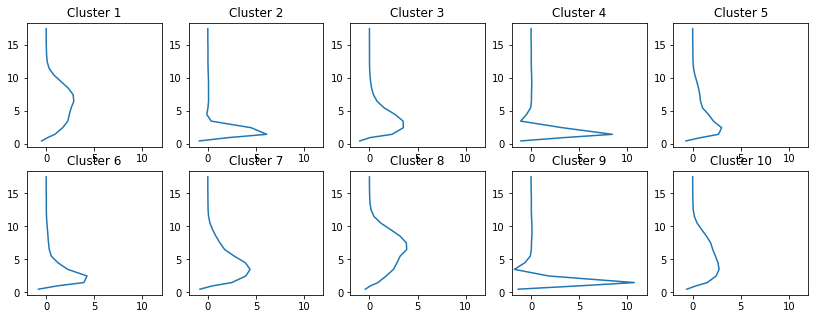

In [114]:
fig = plt.figure(figsize=(14,5))

print(F.CENTERS[:,-1])
for i in range(len(F.CENTERS)):
    ax = plt.subplot(2, 5, i+1)
    a = ax.plot(F.CENTERS[i,:],F.altitude);
    plt.title('Cluster ' + str(i+1))
    plt.xlim(-2,12)
    


CPU times: user 52.6 s, sys: 35.9 s, total: 1min 28s
Wall time: 1min 48s


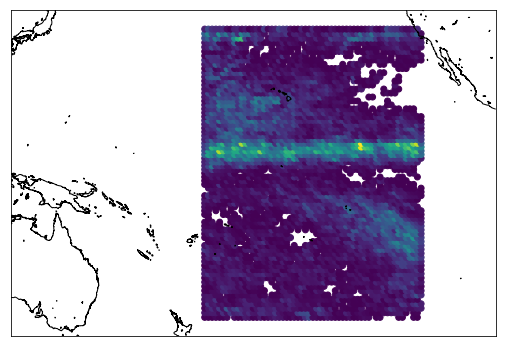

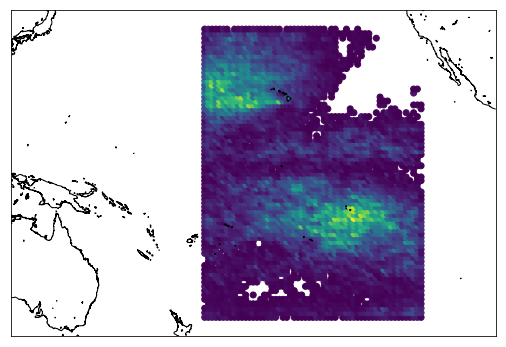

In [122]:
heat_map_byCluster(1,1,F.Data,F.klabels_originalData,F.Time.dt.months)

heat_map_byCluster(7,1,F.Data,F.klabels_originalData,F.Time.dt.months)

In [26]:
ind = (F.Time.dt.year==2009) & (F.Time.dt.month==1) & (F.Time.dt.day==2)
db_ind = np.unique(F.DBLabel[ind])
print(db_ind)
subset_dblabels = []
subset_lat = []
subset_lon = []
subset_time = []

for i in range(len(db_ind)):
    ind = F.DBLabel==db_ind[i]
    subset_dblabels = np.append(subset_dblabels,F.DBLabel[ind])
    subset_lat = np.append(subset_lat,F.Latitude[ind])
    subset_lon = np.append(subset_lon,F.Longitude[ind])
    subset_time = np.append(subset_time,np.array(F.Time[ind]-np.datetime64('2009-01-01'),'float')/3.6e12)


[105868 105878 105904 105911 106133 106186 106237 106250 106302 106314
 106337 106484]


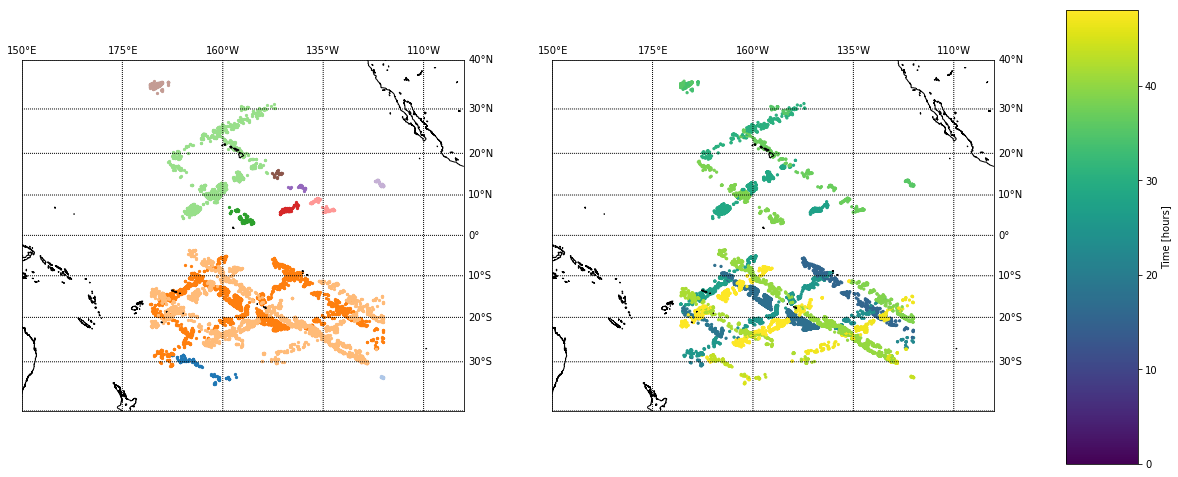

In [27]:
# bbox = [5,25,360-170,360-150]
uniqLabels = np.unique(subset_dblabels)

bbox = [-40,40,150,260]

fig = plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')
cmap = plt.get_cmap('tab20')

# Draw coastlines
m.drawcoastlines()

for ii in range(len(uniqLabels)):
    color_interp = np.interp(ii,[0,len(uniqLabels)],[0,20])
    m.scatter(np.array(subset_lon[subset_dblabels==uniqLabels[ii]]), 
              np.array(subset_lat[subset_dblabels==uniqLabels[ii]]), 
              latlon=True,marker='o',color=cmap(ii),s=5)
    
parallels = np.arange(-60.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False]);
# plt.colorbar().set_label('Time')
verts = np.arange(0.,360,25.)
# labels = [left,right,top,bottom]
m.drawmeridians(verts,labels=[False,True,True,False]);

plt.subplot(1,2,2)
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')
cmap = plt.get_cmap('tab20')

# Draw coastlines
m.drawcoastlines()

for ii in range(len(uniqLabels)):
    im = m.scatter(np.array(subset_lon[subset_dblabels==uniqLabels[ii]]), 
              np.array(subset_lat[subset_dblabels==uniqLabels[ii]]), 
              latlon=True,marker='o',c=subset_time[subset_dblabels==uniqLabels[ii]],s=5, vmin=0, vmax=48)
    
parallels = np.arange(-60.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False]);
verts = np.arange(0.,360,25.)
# labels = [left,right,top,bottom]
m.drawmeridians(verts,labels=[False,True,True,False]);

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Time [hours]')



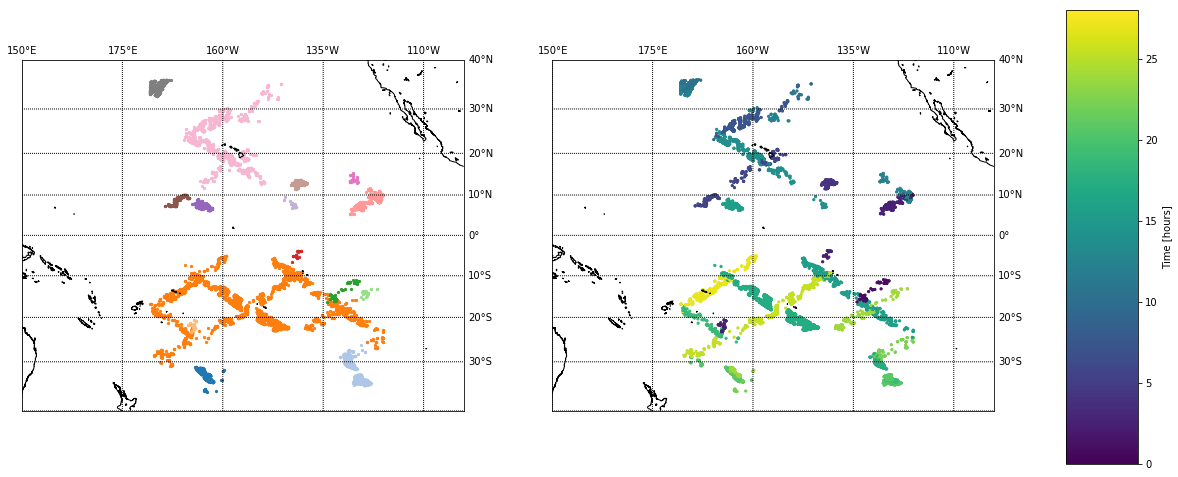

In [10]:
# bbox = [5,25,360-170,360-150]
uniqLabels = np.unique(subset_dblabels)

bbox = [-40,40,150,260]

fig = plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')
cmap = plt.get_cmap('tab20')

# Draw coastlines
m.drawcoastlines()

for ii in range(len(uniqLabels)):
    color_interp = np.interp(ii,[0,len(uniqLabels)],[0,20])
    m.scatter(np.array(subset_lon[subset_dblabels==uniqLabels[ii]]), 
              np.array(subset_lat[subset_dblabels==uniqLabels[ii]]), 
              latlon=True,marker='o',color=cmap(ii),s=5)
    
parallels = np.arange(-60.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False]);
# plt.colorbar().set_label('Time')
verts = np.arange(0.,360,25.)
# labels = [left,right,top,bottom]
m.drawmeridians(verts,labels=[False,True,True,False]);

plt.subplot(1,2,2)
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')
cmap = plt.get_cmap('tab20')

# Draw coastlines
m.drawcoastlines()

for ii in range(len(uniqLabels)):
    im = m.scatter(np.array(subset_lon[subset_dblabels==uniqLabels[ii]]), 
              np.array(subset_lat[subset_dblabels==uniqLabels[ii]]), 
              latlon=True,marker='o',c=subset_time[subset_dblabels==uniqLabels[ii]],s=5, vmin=0, vmax=28)
    
parallels = np.arange(-60.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False]);
verts = np.arange(0.,360,25.)
# labels = [left,right,top,bottom]
m.drawmeridians(verts,labels=[False,True,True,False]);

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Time [hours]')



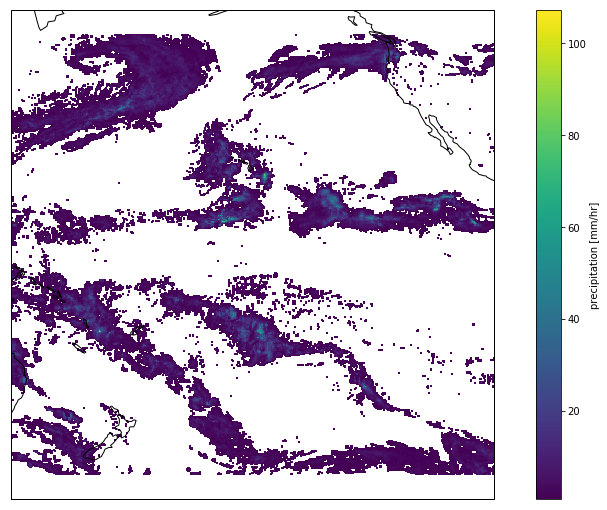

In [13]:
import cartopy.crs as ccrs

rainrate = np.zeros((1440,400))
for file in glob.glob('TRMM L3/*.nc4'):
    trmm_gridded = xr.open_dataset(file)
    toadd = np.array(trmm_gridded.precipitation)
    toadd[toadd<2/3]=0
    rainrate += toadd
    trmm_gridded.precipitation.values = rainrate
    
fig = plt.figure(figsize=(15,9))
ax = plt.axes(projection=ccrs.PlateCarree(180))

# trmm_gridded.precipitation.values = rainrate
p = trmm_gridded.precipitation.where(trmm_gridded.precipitation>0).plot(ax=ax,x='nlon',y='nlat',transform=ccrs.PlateCarree())
ax.set_extent((150, 260, -40, 40))
ax.coastlines();


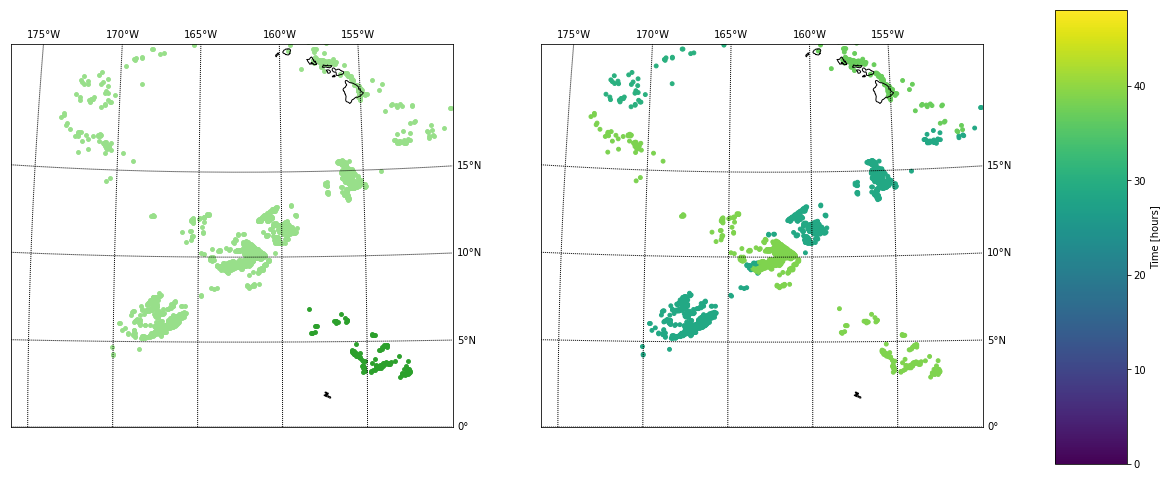

In [28]:
# bbox = [5,25,360-170,360-150]
uniqLabels = np.unique(subset_dblabels)

bbox = [0,22,-176,-149]

fig = plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='cass',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i',
            lon_0=(bbox[2]+bbox[3])/2,lat_0=(bbox[0]+bbox[1])/2)
cmap = plt.get_cmap('tab20')

# Draw coastlines
m.drawcoastlines()

for ii in range(len(uniqLabels)):
    color_interp = np.interp(ii,[0,len(uniqLabels)],[0,20])
    m.scatter(np.array(subset_lon[subset_dblabels==uniqLabels[ii]]), 
              np.array(subset_lat[subset_dblabels==uniqLabels[ii]]), 
              latlon=True,marker='o',color=cmap(ii),s=15)
    
parallels = np.arange(0.,20,5.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False]);
# plt.colorbar().set_label('Time')
verts = np.arange(-175.,-150,5.)
# labels = [left,right,top,bottom]
m.drawmeridians(verts,labels=[False,True,True,False]);

plt.subplot(1,2,2)
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='cass',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i',
            lon_0=(bbox[2]+bbox[3])/2,lat_0=(bbox[0]+bbox[1])/2)

cmap = plt.get_cmap('tab20')

# Draw coastlines
m.drawcoastlines()

for ii in range(len(uniqLabels)):
    im = m.scatter(np.array(subset_lon[subset_dblabels==uniqLabels[ii]]), 
              np.array(subset_lat[subset_dblabels==uniqLabels[ii]]), 
              latlon=True,marker='o',c=subset_time[subset_dblabels==uniqLabels[ii]],s=15, vmin=0, vmax=48)
    
parallels = np.arange(0.,20,5.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False]);
verts = np.arange(-175.,-150,5.)
# labels = [left,right,top,bottom]
m.drawmeridians(verts,labels=[False,True,True,False]);

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Time [hours]')



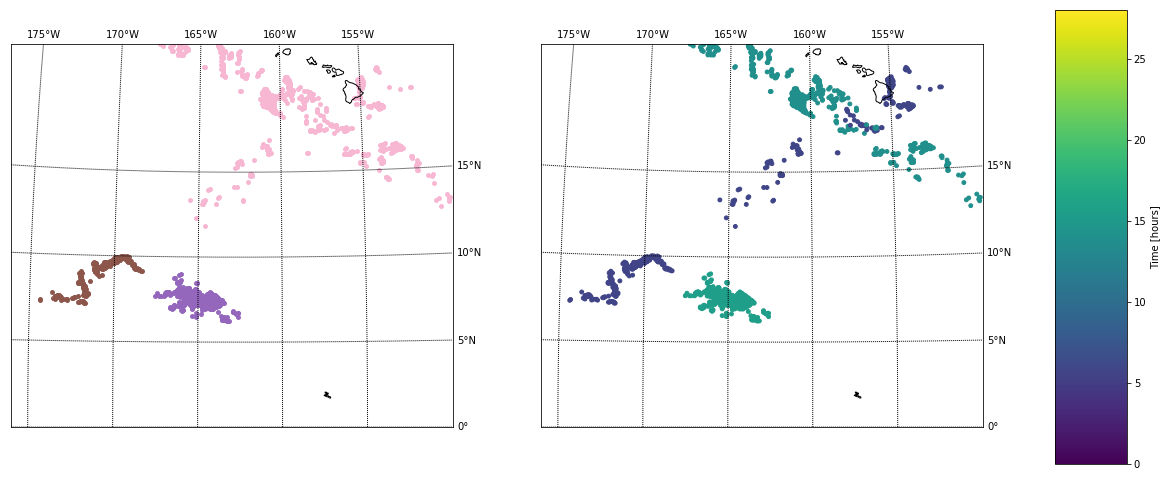

In [21]:
# bbox = [5,25,360-170,360-150]
uniqLabels = np.unique(subset_dblabels)

bbox = [0,22,-176,-149]

fig = plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='cass',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i',
            lon_0=(bbox[2]+bbox[3])/2,lat_0=(bbox[0]+bbox[1])/2)
cmap = plt.get_cmap('tab20')

# Draw coastlines
m.drawcoastlines()

for ii in range(len(uniqLabels)):
    color_interp = np.interp(ii,[0,len(uniqLabels)],[0,20])
    m.scatter(np.array(subset_lon[subset_dblabels==uniqLabels[ii]]), 
              np.array(subset_lat[subset_dblabels==uniqLabels[ii]]), 
              latlon=True,marker='o',color=cmap(ii),s=15)
    
parallels = np.arange(0.,20,5.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False]);
# plt.colorbar().set_label('Time')
verts = np.arange(-175.,-150,5.)
# labels = [left,right,top,bottom]
m.drawmeridians(verts,labels=[False,True,True,False]);

plt.subplot(1,2,2)
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='cass',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i',
            lon_0=(bbox[2]+bbox[3])/2,lat_0=(bbox[0]+bbox[1])/2)

cmap = plt.get_cmap('tab20')

# Draw coastlines
m.drawcoastlines()

for ii in range(len(uniqLabels)):
    im = m.scatter(np.array(subset_lon[subset_dblabels==uniqLabels[ii]]), 
              np.array(subset_lat[subset_dblabels==uniqLabels[ii]]), 
              latlon=True,marker='o',c=subset_time[subset_dblabels==uniqLabels[ii]],s=15, vmin=0, vmax=28)
    
parallels = np.arange(0.,20,5.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False]);
verts = np.arange(-175.,-150,5.)
# labels = [left,right,top,bottom]
m.drawmeridians(verts,labels=[False,True,True,False]);

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Time [hours]')



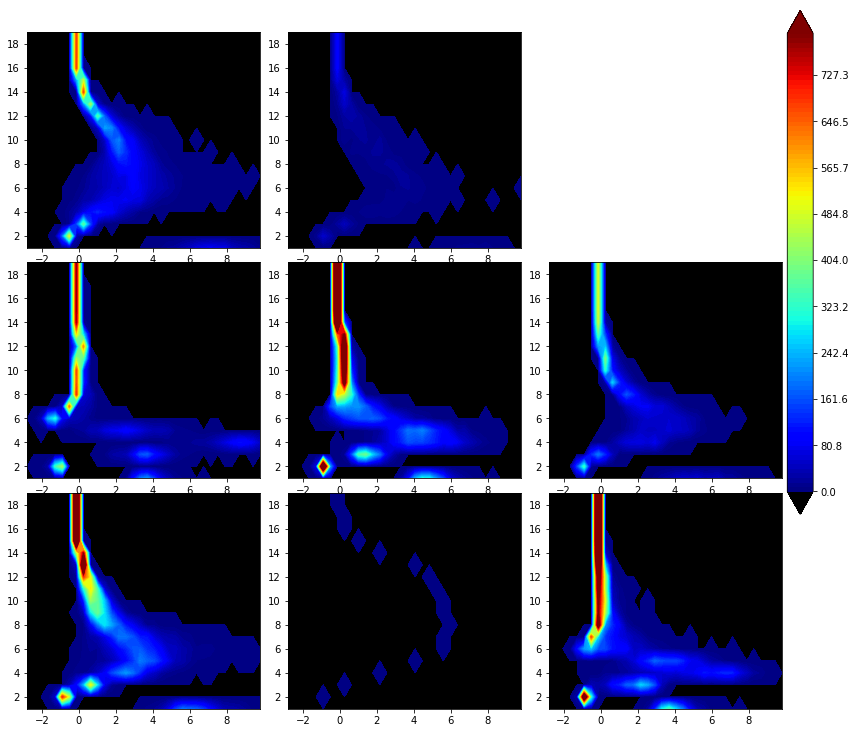

In [275]:
fig = plt.figure(figsize=(12,10))
for j in range(len(CENTERS)):
    ax1 = fig.add_axes([np.floor(j/3)*.302+.02, (np.remainder(j,3)-1)*.32+.05, .27, .3])
    clust = Xdata[klabels==j,:]
    bins = np.linspace(-3,10,num=35)
    level = np.linspace(1,19,num=19)
    COUNTS = np.zeros((19,len(bins)-1))
    for i in range(19):
        count, var2 = np.histogram(clust[:,i+1],bins)
        COUNTS[i,:] = count

    cs = plt.contourf((bins[:-1]+bins[1:])/2,level,COUNTS,levels = np.linspace(0,800,100), cmap=plt.cm.jet, extend='both')

    cs.cmap.set_under('k')
    cs.set_clim(0, 800)
    
cbaxes = fig.add_axes([0.9, 0, 0.03, 0.7]) 
cb = plt.colorbar(cs,cax = cbaxes)

